In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
df= pd.read_csv('Extended_Employee_Performance_and_Productivity_Data.csv')

In [5]:
df.isna().sum()

Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

In [6]:
df.dtypes

Employee_ID                      int64
Department                      object
Gender                          object
Age                              int64
Job_Title                       object
Hire_Date                       object
Years_At_Company                 int64
Education_Level                 object
Performance_Score                int64
Monthly_Salary                 float64
Work_Hours_Per_Week              int64
Projects_Handled                 int64
Overtime_Hours                   int64
Sick_Days                        int64
Remote_Work_Frequency            int64
Team_Size                        int64
Training_Hours                   int64
Promotions                       int64
Employee_Satisfaction_Score    float64
Resigned                          bool
dtype: object

In [7]:
df.drop(columns=['Hire_Date'],inplace=True)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV


In [10]:
cat_cols = df.select_dtypes(include=['object']).columns

In [11]:
df = pd.get_dummies(df,columns=cat_cols,drop_first=True )

In [12]:
df.shape

(100000, 34)

Correlation matrix of 10 most correlated variables

<AxesSubplot: >

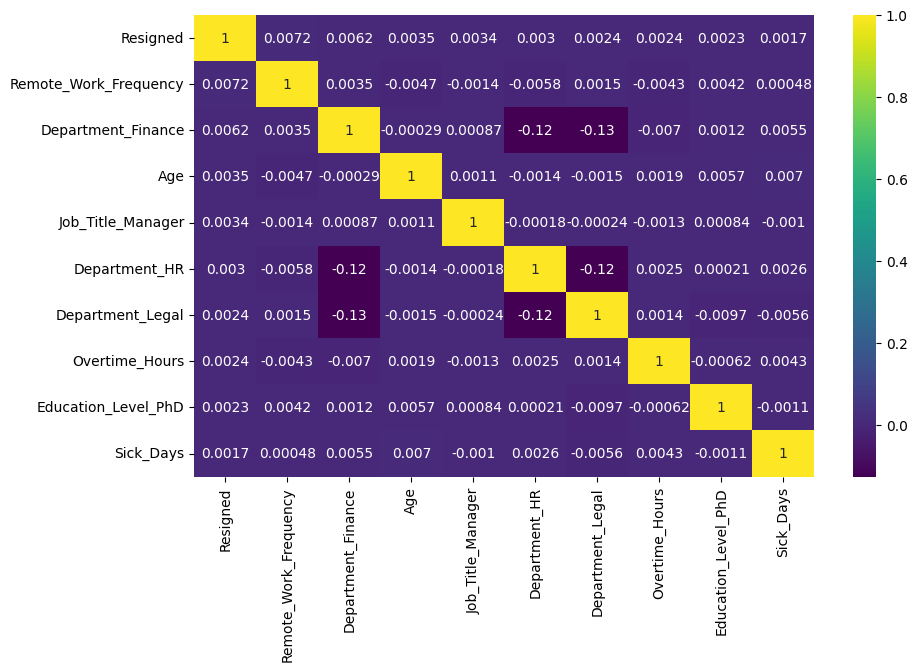

In [13]:
k=10
corr_cols = df.corr().nlargest(k,'Resigned')['Resigned'].index
cm = df[corr_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

Exploratory Data Analysis:

In [16]:
Resigned = df[df.Resigned==True]

In [17]:
Notresigned = df[df.Resigned == False]

In [18]:
from matplotlib import cm

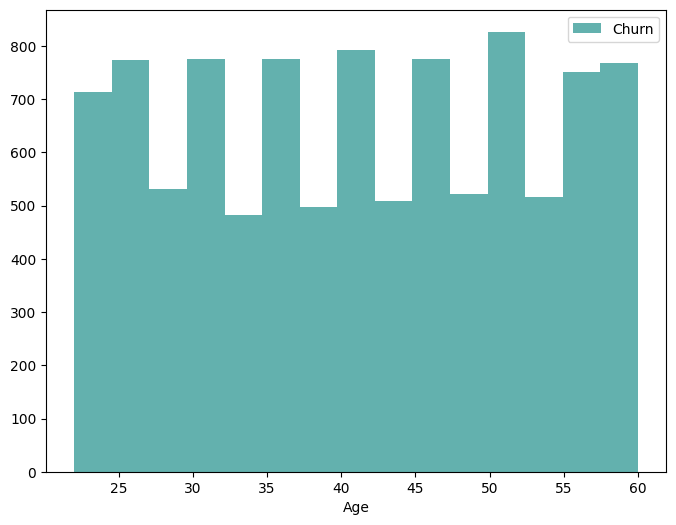

In [19]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Age')
pyplot.hist(Resigned["Age"],bins=15, alpha=0.7, label='Churn',color=cm.viridis(0.5))
pyplot.legend(loc='upper right')
pyplot.show()

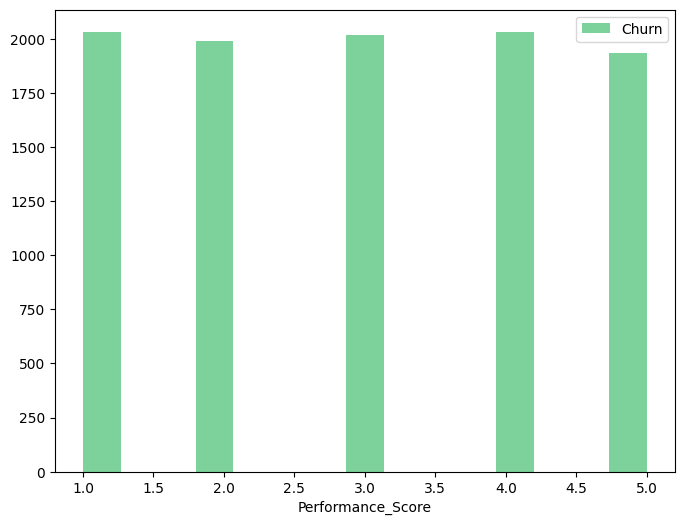

In [20]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Performance_Score')
pyplot.hist(Resigned["Performance_Score"],bins=15, alpha=0.7, label='Churn',color=cm.viridis(0.7))
pyplot.legend(loc='upper right')
pyplot.show()

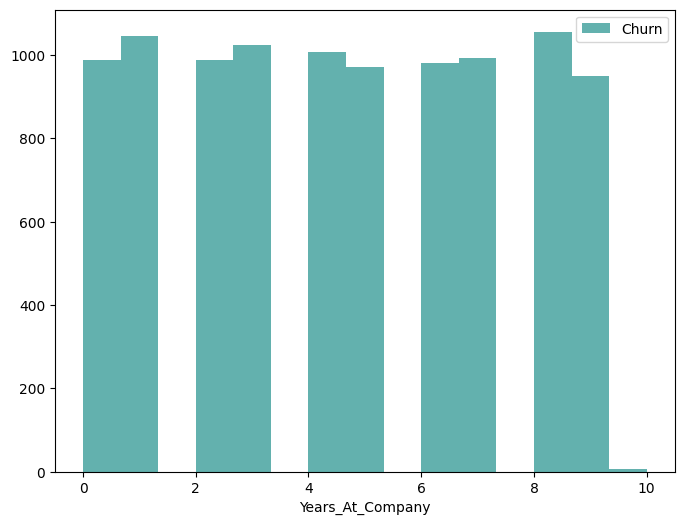

In [22]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Years_At_Company')
pyplot.hist(Resigned["Years_At_Company"],bins=15, alpha=0.7, label='Churn',color=cm.viridis(0.5))
pyplot.legend(loc='upper right')
pyplot.show()

In [29]:
df.dtypes

Age                              int64
Years_At_Company                 int64
Performance_Score                int64
Monthly_Salary                 float64
Work_Hours_Per_Week              int64
Projects_Handled                 int64
Overtime_Hours                   int64
Sick_Days                        int64
Remote_Work_Frequency            int64
Team_Size                        int64
Training_Hours                   int64
Promotions                       int64
Employee_Satisfaction_Score    float64
Resigned                          bool
Department_Engineering            bool
Department_Finance                bool
Department_HR                     bool
Department_IT                     bool
Department_Legal                  bool
Department_Marketing              bool
Department_Operations             bool
Department_Sales                  bool
Gender_Male                       bool
Gender_Other                      bool
Job_Title_Consultant              bool
Job_Title_Developer      

In [23]:
df.drop('Employee_ID',axis=1,inplace=True)

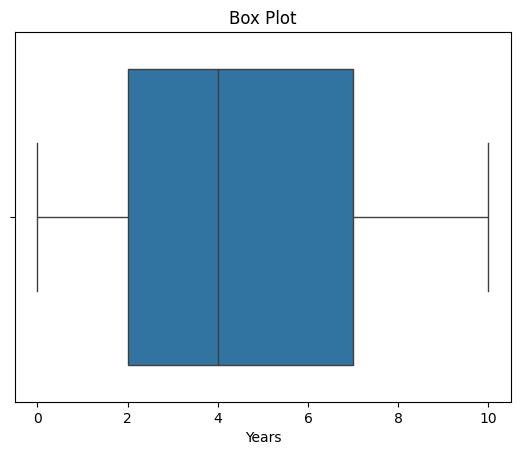

In [28]:
# Box plot
sns.boxplot(data=Resigned['Years_At_Company'], orient='h')
plt.title("Box Plot")
plt.xlabel("Years")
plt.show()

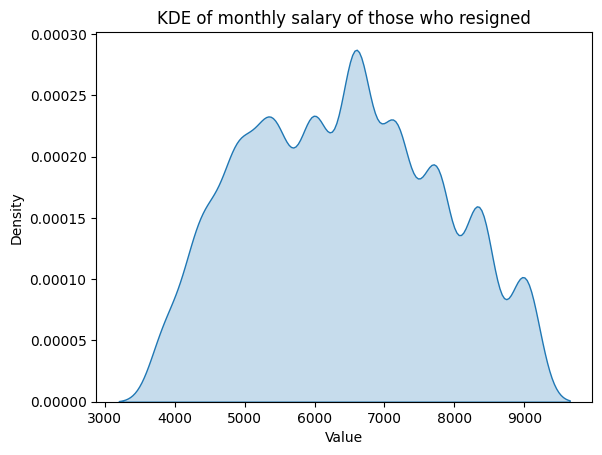

In [31]:
# Density plot
sns.kdeplot(Resigned['Monthly_Salary'], fill=True)
plt.title("KDE of monthly salary of those who resigned")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

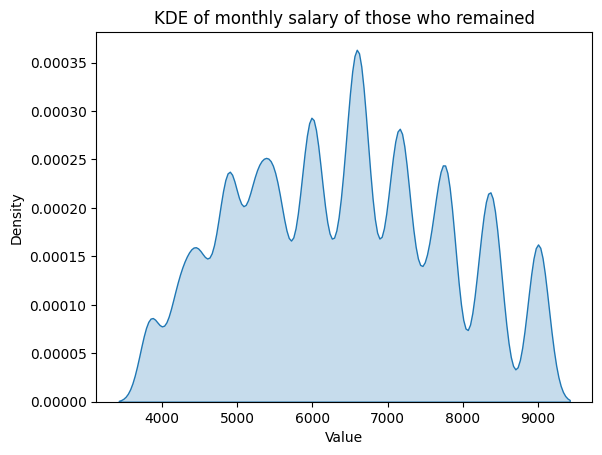

In [33]:
# Density plot
sns.kdeplot(Notresigned['Monthly_Salary'], fill=True)
plt.title("KDE of monthly salary of those who remained")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

In [34]:
X = df.drop("Resigned",axis=1)
y = df["Resigned"]
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345)
# Models for Classification

models = [('LR', LogisticRegression(random_state=123456, max_iter=20000)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=123456)),
          ('RF', RandomForestClassifier(random_state=123456)),
          ('SVR', SVC(gamma='auto',random_state=123456)),
          ('GB', GradientBoostingClassifier(random_state = 12345)),
          ("LightGBM", LGBMClassifier(random_state=123456))]
results = []
names = []

def crossvalidator(models,x):
    name, model =models[x]
    print(models[x])
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


In [ ]:
crossvalidator(models,len(results))

('LR', LogisticRegression(max_iter=20000, random_state=123456))


C:\Users\p_sar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\p_sar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sci

LR: 0.899900 (0.002850)


C:\Users\p_sar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


: 

In [33]:
results

[array([0.8953, 0.8997, 0.9009, 0.9007, 0.9019, 0.8984, 0.9026, 0.8957,
        0.8988, 0.905 ])]